In [45]:
import pandas as pd
import numpy as np
import os

from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='classifier')

def getClassifiers():
    all_clfs_names = []
    all_clfs_clf = []
    for name, ClassifierClass in estimators:
        print("Imported " + name)
        try:
            clf = ClassifierClass()
            all_clfs_names.append(clf)
            all_clfs_clf.append(clf)
        except Exception as e:
            print('Unable to import', name)
            print(e)
    return all_clfs_names, all_clfs_clf

df = pd.read_csv(r'data/data_processed.csv')
df_continous = pd.read_csv(r'data/data_continous.csv')
df_categorical = pd.read_csv(r'data/data_categorical.csv')

# --------------------------------------------------------------------------------------------------
# copying job satisfaction into new array
JSat = df['JobSatisfaction'].values

# splitting inputs by row index
# continous data
df_training_continous = df_continous.iloc[:1200,:]
df_validation_continous = df_continous.iloc[1200:,:]
# categorical data
df_training_categorical = df_categorical.iloc[:1200,:]
df_validation_categorical = df_categorical.iloc[1200:,:]
# splitting outputs by number
JSat_training = JSat[:1200]
JSat_validation = JSat[1200:]
# --------------------------------------------------------------------------------------------------

all_clfs_names, all_clfs_clf = getClassifiers()

log_reg_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5}]
naive_bayes_params = [{}]
svc_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]

model_classes = []

for clf_name, clf in estimators:
    clf_params = []
    clf_name = str(clf_name)
    if(clf_name == "LogisticRegression"): clf_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}, {"solver":'lbfgs'}, {"solver":'liblinear'}, {"solver":'newton-cg'}, {"solver":'sag'}, {"solver":'saga'}, ]
    elif(clf_name == "DecisionTreeClassifier"):  clf_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
    elif(clf_name == "RandomForestClassifier"): clf_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
    elif(clf_name == "KNeighborsClassifier"): clf_params = [{"n_neighbors":3}, {"n_neighbors":5}]
    elif(clf_name == "GaussianNB"): clf_params = [{"var_smoothing":1e-9}, {"var_smoothing":1e-5}, {"var_smoothing":1e-12}]
    elif(clf_name == "SVC"): clf_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}, {"kernel":"linear"}, {"kernel":"rbf"}, {"kernel":"sigmoid"}, {"kernel":"poly"}]
    elif(clf_name == "AdaBoostClassifier"): clf_params = [{"n_estimators":100}, {"n_estimators":50}, {"n_estimators":200}, {"random_state":0}]
    elif(clf_name == "BaggingClassifier"): clf_params = [{}]
    elif(clf_name == 'BernoulliNB'): clf_params = [{}]
    elif(clf_name == 'CalibratedClassifierCV'): clf_params = [{}]
    elif(clf_name == 'CategoricalNB'): clf_params = [{"min_categories":17}] # doesn't work for some reason
    elif(clf_name == 'ClassifierChain'): clf_params = [{}]
    elif(clf_name == 'ComplementNB'): clf_params = [{}]
    elif(clf_name == 'DummyClassifier'): clf_params = [{}]
    elif(clf_name == 'ExtraTreeClassifier'): clf_params = [{}]
    elif(clf_name == 'ExtraTreesClassifier'): clf_params = [{}]
    elif(clf_name == 'GaussianProcessClassifier'): clf_params = [{}]
    elif(clf_name == 'GradientBoostingClassifier'): clf_params = [{}]
    elif(clf_name == 'HistGradientBoostingClassifier'): clf_params = [{}]
    elif(clf_name == 'LabelPropagation'): clf_params = [{}]
    elif(clf_name == 'LabelSpreading'): clf_params = [{}]
    elif(clf_name == 'LinearDiscriminantAnalysis'): clf_params = [{}]
    elif(clf_name == 'LinearSVC'): clf_params = [{}]
    elif(clf_name == 'LogisticRegressionCV'): clf_params = [{}]
    elif(clf_name == 'MLPClassifier'): clf_params = [{}]
    elif(clf_name == 'MultiOutputClassifier'): clf_params = [{}]
    elif(clf_name == 'MultinomialNB'): clf_params = [{}]
    elif(clf_name == 'NearestCentroid'): clf_params = [{}]
    elif(clf_name == 'NuSVC'): clf_params = [{}]
    elif(clf_name == 'OneVsOneClassifier'): clf_params = [{}]
    elif(clf_name == 'OneVsRestClassifier'): clf_params = [{}]
    elif(clf_name == 'OutputCodeClassifier'): clf_params = [{}]
    elif(clf_name == 'PassiveAggressiveClassifier'): clf_params = [{}]
    elif(clf_name == 'Perceptron'): clf_params = [{}]
    elif(clf_name == 'QuadraticDiscriminantAnalysis'): clf_params = [{}]
    elif(clf_name == 'RadiusNeighborsClassifier'): clf_params = [{}]
    elif(clf_name == 'RidgeClassifier'): clf_params = [{}]
    elif(clf_name == 'RidgeClassifierCV'): clf_params = [{}]
    elif(clf_name == 'SGDClassifier'): clf_params = [{}]
    elif(clf_name == 'StackingClassifier'): clf_params = [{}]
    elif(clf_name == 'VotingClassifier'): clf_params = [{}]
    
    model_classes.append([clf, clf_name, clf_params])
    print("Appended" + str(clf_name) + " with params " + str(clf_params))

insights = []
for Model, modelname, params_list in model_classes:
    # skip these because we don't know how to make them work.. :)
    if modelname == "CategoricalNB" or modelname == "ClassifierChain" or modelname == "MultiOutputClassifier" or modelname == "OneVsOneClassifier" or modelname == "OneVsRestClassifier" or modelname == "MultiOutputClassifier" or modelname == "OutputCodeClassifier" or modelname == "RadiusNeighborsClassifier" or modelname == "StackingClassifier" or modelname == "VotingClassifier":
        continue

    # check that params are initialized
    if params_list != []:
        for params in params_list:
            print(str(modelname) + " with x_length: " + str((df_validation_categorical).shape) + " y_length: " + str((JSat_validation).shape) + " with params: " + str(params))
            model = Model(**params)
            model.fit(df_training_categorical, JSat_training)
            score = model.score(df_validation_categorical, JSat_validation)
            insights.append((modelname, model, params, score))



Imported AdaBoostClassifier
Imported BaggingClassifier
Imported BernoulliNB
Imported CalibratedClassifierCV
Imported CategoricalNB
Imported ClassifierChain
Unable to import ClassifierChain
_BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
Imported ComplementNB
Imported DecisionTreeClassifier
Imported DummyClassifier
Imported ExtraTreeClassifier
Imported ExtraTreesClassifier
Imported GaussianNB
Imported GaussianProcessClassifier
Imported GradientBoostingClassifier
Imported HistGradientBoostingClassifier
Imported KNeighborsClassifier
Imported LabelPropagation
Imported LabelSpreading
Imported LinearDiscriminantAnalysis
Imported LinearSVC
Imported LogisticRegression
Imported LogisticRegressionCV
Imported MLPClassifier
Imported MultiOutputClassifier
Unable to import MultiOutputClassifier
MultiOutputClassifier.__init__() missing 1 required positional argument: 'estimator'
Imported MultinomialNB
Imported NearestCentroid
Imported NuSVC
Imported OneVsOneClassifier
U

c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

ComplementNB with x_length: (270, 17) y_length: (270,) with params: {}
DecisionTreeClassifier with x_length: (270, 17) y_length: (270,) with params: {'criterion': 'gini'}
DecisionTreeClassifier with x_length: (270, 17) y_length: (270,) with params: {'criterion': 'entropy'}
DummyClassifier with x_length: (270, 17) y_length: (270,) with params: {}
ExtraTreeClassifier with x_length: (270, 17) y_length: (270,) with params: {}
ExtraTreesClassifier with x_length: (270, 17) y_length: (270,) with params: {}
GaussianNB with x_length: (270, 17) y_length: (270,) with params: {'var_smoothing': 1e-09}
GaussianNB with x_length: (270, 17) y_length: (270,) with params: {'var_smoothing': 1e-05}
GaussianNB with x_length: (270, 17) y_length: (270,) with params: {'var_smoothing': 1e-12}
GaussianProcessClassifier with x_length: (270, 17) y_length: (270,) with params: {}
GradientBoostingClassifier with x_length: (270, 17) y_length: (270,) with params: {}
HistGradientBoostingClassifier with x_length: (270, 1

c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


LinearDiscriminantAnalysis with x_length: (270, 17) y_length: (270,) with params: {}
LinearSVC with x_length: (270, 17) y_length: (270,) with params: {}


c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

LogisticRegression with x_length: (270, 17) y_length: (270,) with params: {'C': 0.01}
LogisticRegression with x_length: (270, 17) y_length: (270,) with params: {'C': 0.1}
LogisticRegression with x_length: (270, 17) y_length: (270,) with params: {'C': 1}
LogisticRegression with x_length: (270, 17) y_length: (270,) with params: {'C': 10}
LogisticRegression with x_length: (270, 17) y_length: (270,) with params: {'solver': 'lbfgs'}
LogisticRegression with x_length: (270, 17) y_length: (270,) with params: {'solver': 'liblinear'}
LogisticRegression with x_length: (270, 17) y_length: (270,) with params: {'solver': 'newton-cg'}
LogisticRegression with x_length: (270, 17) y_length: (270,) with params: {'solver': 'sag'}
LogisticRegression with x_length: (270, 17) y_length: (270,) with params: {'solver': 'saga'}
LogisticRegressionCV with x_length: (270, 17) y_length: (270,) with params: {}


c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\siman\AppData\Local\Programs\Py

MLPClassifier with x_length: (270, 17) y_length: (270,) with params: {}


c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MultinomialNB with x_length: (270, 17) y_length: (270,) with params: {}
NearestCentroid with x_length: (270, 17) y_length: (270,) with params: {}
NuSVC with x_length: (270, 17) y_length: (270,) with params: {}
PassiveAggressiveClassifier with x_length: (270, 17) y_length: (270,) with params: {}
Perceptron with x_length: (270, 17) y_length: (270,) with params: {}
QuadraticDiscriminantAnalysis with x_length: (270, 17) y_length: (270,) with params: {}
RandomForestClassifier with x_length: (270, 17) y_length: (270,) with params: {'criterion': 'gini'}


c:\Users\siman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


RandomForestClassifier with x_length: (270, 17) y_length: (270,) with params: {'criterion': 'entropy'}
RidgeClassifier with x_length: (270, 17) y_length: (270,) with params: {}
RidgeClassifierCV with x_length: (270, 17) y_length: (270,) with params: {}
SGDClassifier with x_length: (270, 17) y_length: (270,) with params: {}
SVC with x_length: (270, 17) y_length: (270,) with params: {'C': 0.01}
SVC with x_length: (270, 17) y_length: (270,) with params: {'C': 0.1}
SVC with x_length: (270, 17) y_length: (270,) with params: {'C': 1}
SVC with x_length: (270, 17) y_length: (270,) with params: {'C': 10}
SVC with x_length: (270, 17) y_length: (270,) with params: {'kernel': 'linear'}
SVC with x_length: (270, 17) y_length: (270,) with params: {'kernel': 'rbf'}
SVC with x_length: (270, 17) y_length: (270,) with params: {'kernel': 'sigmoid'}
SVC with x_length: (270, 17) y_length: (270,) with params: {'kernel': 'poly'}


C:\Users\siman\AppData\Local\Temp\ipykernel_9824\2964949159.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


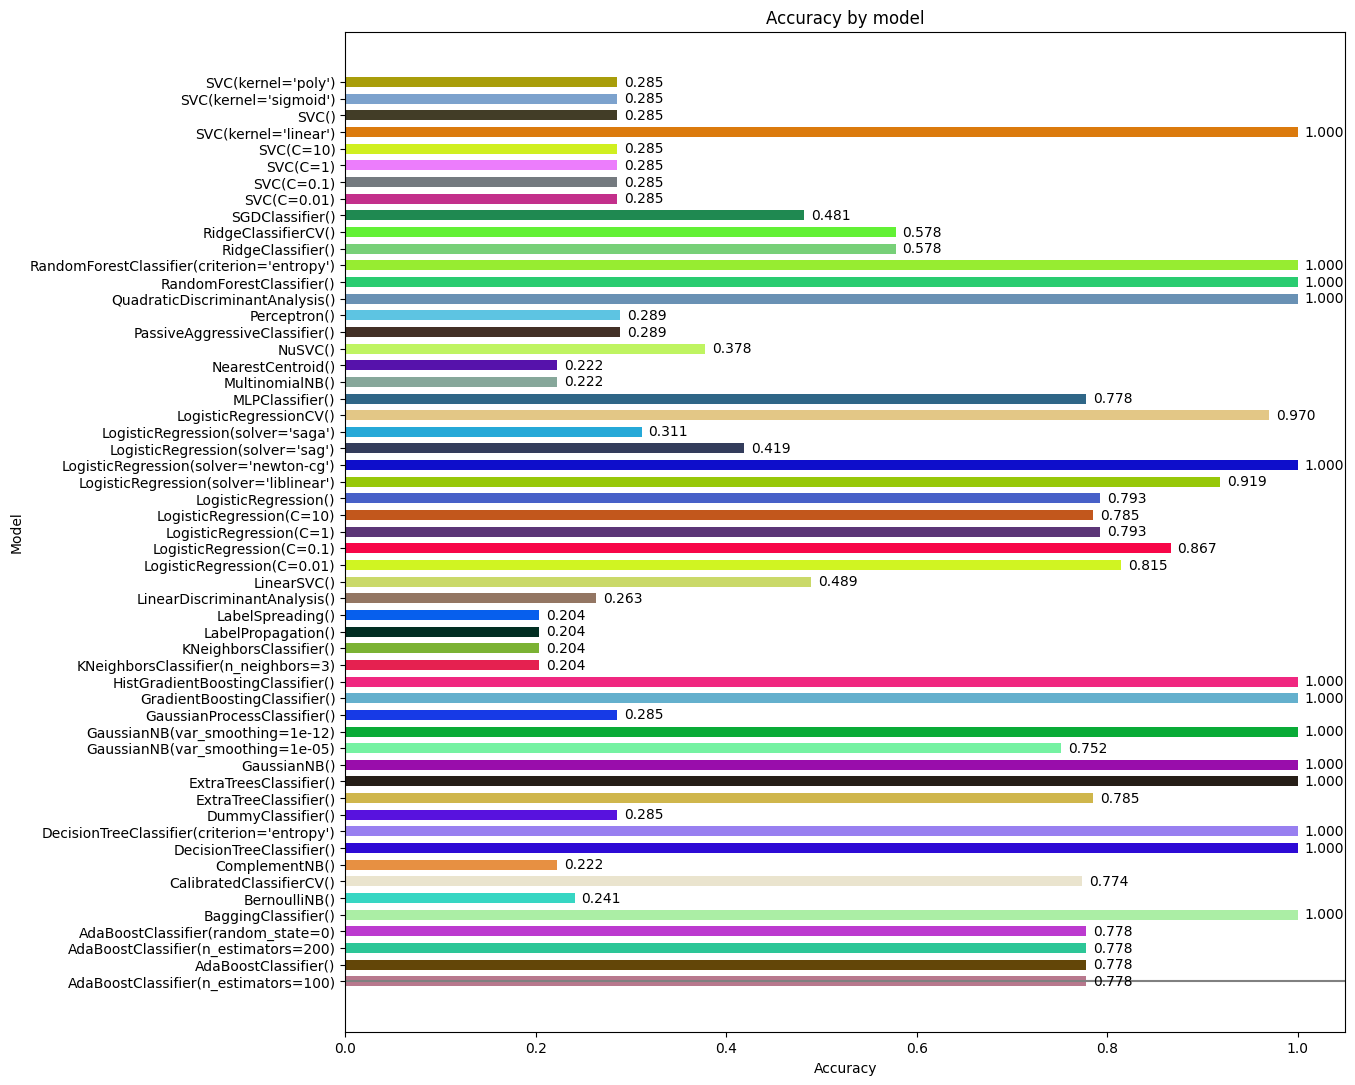

In [46]:
# visualize insights for different models with params
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])

plt_models = []
plt_accuracy = []
for _, model, _, accuracy in insights:
    plt_models.append(str(model))
    plt_accuracy.append(accuracy)

ax.barh(plt_models, plt_accuracy, height=0.6, linewidth=0.2, align='center', color=np.random.rand(len(plt_models),3))
ax.axhline(0, color='grey')
ax.set_ylabel('Model')
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy by model')
ax.set_yticks(plt_models, labels=plt_models)

# add labels at the end
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.3f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.tight_layout()
plt.show()
fig.savefig("acc_by_model.png",bbox_inches='tight')

In [ ]:
# visualize plots by different model parameters
plt_models_by_clf = []
for model_name, model_class, model_params, model_score in insights:
    



In [ ]:
# pick best accuracy models and compare them to the rest
plt_model_best = []
_count = 0
for model_name, model_class, model_params, model_score in insights:
    if not model_name in plt_model_best:
        plt_model_best.append({"name": model_name, "parameters": model_params, "accuracy": model_score})
    else:
        for best_name, best_parameters, best_accuracy in plt_model_best:
            _count = _count + 1
            if best_name == model_name:
                if best_accuracy < model_score:
                    plt_model_best[_count]["parameters"] = model_params
                    plt_model_best[_count]["accuracy"] = model_score
                if best_accuracy == model_score:
                    plt_model_best[_count]["parameters"] = best_parameters + model_params

                    
